In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [3]:
# # 加載 MNIST 數據
# (x_train, _), (x_test, _) = mnist.load_data()

# # 正規化並重塑數據
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:
# 加載 MNIST 數據
(x_train1, _), (x_test1, _) = mnist.load_data()

# 正規化並重塑數據
x_train = x_train1[0:100].astype('float32') / 255.
x_test = x_test1[0:100].astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(100, 784)
(100, 784)


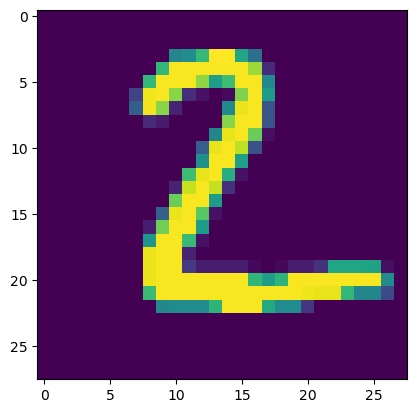

In [5]:
plt.imshow(x_test[1].reshape(28, 28))
# plt.title(f'Label: {y_train_load[1]}')
plt.show()

In [6]:
# # 加载数据
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # 数据预处理
# x_train = normalize(x_train, axis=1)  # 归一化
# x_test = normalize(x_test, axis=1)
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

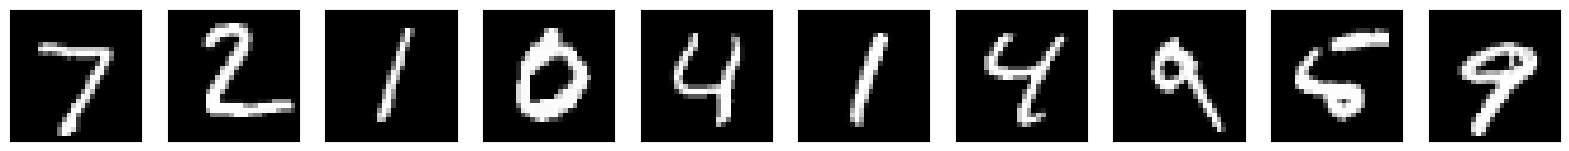

In [7]:
n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    # 顯示原始數據
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 顯示重建數據
    # ax = plt.subplot(2, n, i + 1 + n)
    # plt.imshow(decoded_imgs[i].reshape(28, 28))
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
x_test[1].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
input_dim = x_train.shape[1]  # 784
print(x_train.shape)

(100, 784)


In [ ]:
# 定義輸入層的維度
input_dim = x_train.shape[1]  # 784

# 創建輸入層
input_layer = Input(shape=(784,))

# 創建編碼層
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)  # 編碼後的特徵

# 創建解碼層
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 重建的輸出

# 定義 autoencoder 模型
autoencoder = Model(input_layer, decoded)

# 定義編碼器模型
encoder = Model(input_layer, encoded)

# 定義解碼器模型
encoded_input = Input(shape=(16,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)


In [ ]:
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, 
                epochs=5, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))


In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], 'r', label='Training loss')
# # plt.plot(history.history['val_loss'], 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [ ]:

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    # 顯示原始數據
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    顯示重建數據
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()